In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import scipy

In [58]:
file_source = "data/bike-sharing-demand/"

train = pd.read_csv(file_source + "train.csv", parse_dates = ['datetime'])
test =  pd.read_csv(file_source + "test.csv", parse_dates = ['datetime'])

In [59]:
train.info() #Dtype을 object를 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [60]:
print(train.shape)
print(test.shape)

(10886, 12)
(6493, 9)


In [61]:
train.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [62]:
test.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [63]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [64]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

1) Train과 Test 컬럼에 차이가 나타남,   
예측대상의 변수는 Count인데  
Count = Casual + Registered 라는 것을 유추가 가능함  

In [65]:
for col in train.columns:
    msperc = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (train[col].isnull().sum() / train[col].shape[0]))
    print(msperc)
    
#결측치 파악하는 코드, 잊지마라

column:   datetime	 Percent of NaN value: 0.00%
column:     season	 Percent of NaN value: 0.00%
column:    holiday	 Percent of NaN value: 0.00%
column: workingday	 Percent of NaN value: 0.00%
column:    weather	 Percent of NaN value: 0.00%
column:       temp	 Percent of NaN value: 0.00%
column:      atemp	 Percent of NaN value: 0.00%
column:   humidity	 Percent of NaN value: 0.00%
column:  windspeed	 Percent of NaN value: 0.00%
column:     casual	 Percent of NaN value: 0.00%
column: registered	 Percent of NaN value: 0.00%
column:      count	 Percent of NaN value: 0.00%


In [66]:
!pip install missingno

<AxesSubplot:>

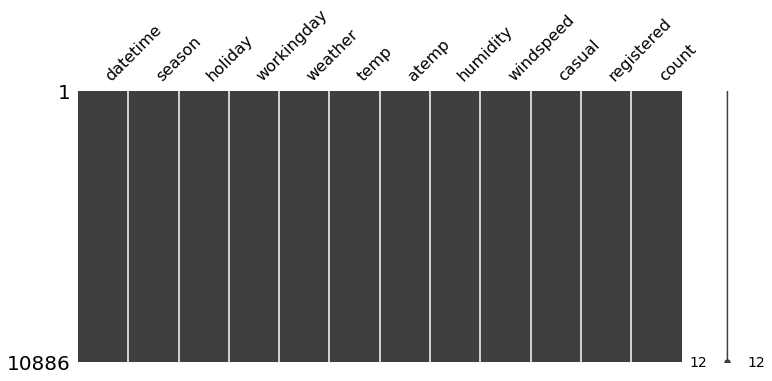

In [67]:
import missingno as msno

msno.matrix(train, figsize=(12,5))
#missing number

C:\Users\qhrrl\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 1.242066
Kurtosis: 1.300093


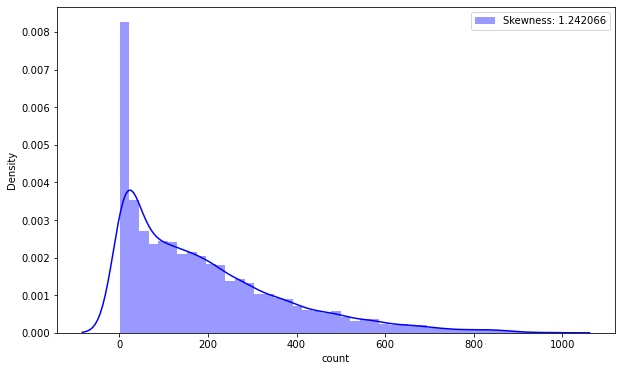

In [68]:
f, ax = plt.subplots(1, 1, figsize = (10, 6))
g = sns.distplot(train['count'], color = 'b', label = 'Skewness: {:2f}'.format(train['count'].skew()), ax=ax)
g = g.legend(loc = 'best')

print("Skewness: %f" % train["count"].skew())
print("Kurtosis: %f" % train["count"].kurt())

#출처: https://hong-yp-ml-records.tistory.com/17?category=823206 [HONG YP's Data Science BLOG:티스토리]

Skewness(비대칭도)란 분포가 얼마나 비대칭을 띄는가 알려주는 척도입니다.  
(비대칭도: a=0이면 정규분포, a<0 이면 오른쪽으로 치우침, a>0이면 왼쪽으로 치우침)  
   
Kurtosis (첨도)란 확률분포의 뾰족한 정도를 나타내는 척도입니다.  
관측치들이 어느 정도 집중적으로 중심에 몰려 있는가를 측정할 때 사용됩니다.  
그래프에 치우침이 보이는 것을 확인할 수 있습니다.   
count 대부분의 데이터가 0에 몰려있는 모습인데요,   
Feature Engineering 단계에서 자세히 알아보도록 하겠습니다.  

# EDA 

In [69]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second

In [70]:
train.shape

(10886, 18)

year 별 자전거 수요량 파악

[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'Rental amount by hour')]

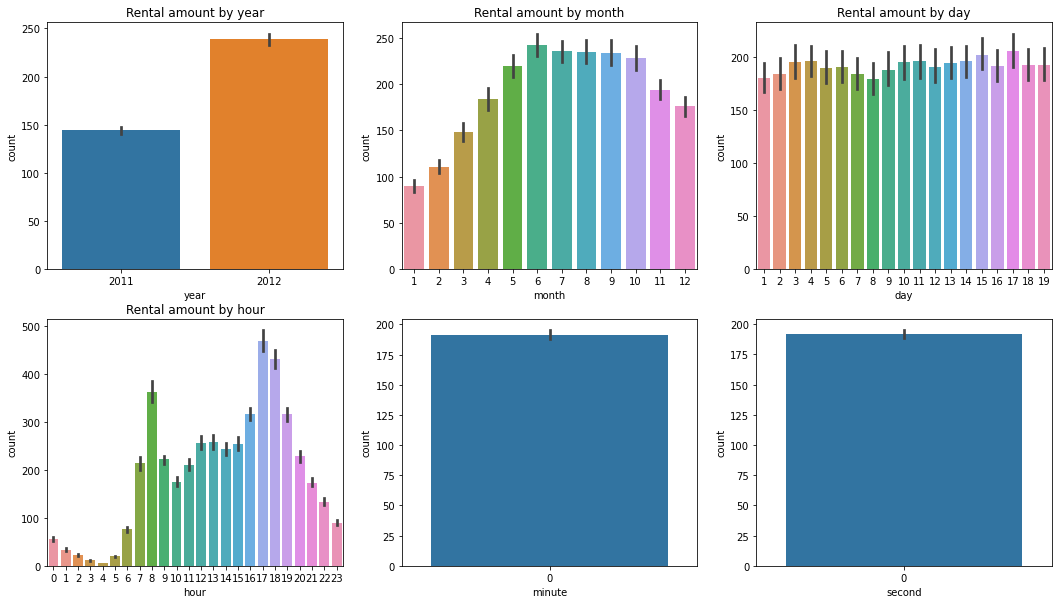

In [73]:
#객체지향방식 사용
figure, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows = 2, ncols = 3)
#2행 3열
figure.set_size_inches(18,10)

sns.barplot(data=train, x = "year", y = "count", ax = ax1)
sns.barplot(data=train, x = "month", y = "count", ax = ax2)
sns.barplot(data=train, x = "day", y = "count", ax = ax3)
sns.barplot(data=train, x = "hour", y = "count", ax = ax4)
sns.barplot(data=train, x = "minute", y = "count", ax = ax5)
sns.barplot(data=train, x = "second", y = "count", ax = ax6)

ax1.set(ylabel = "count", title = "Rental amount by year")
ax2.set(ylabel = "count", title = "Rental amount by month")
ax3.set(ylabel = "count", title = "Rental amount by day")
ax4.set(ylabel = "count", title = "Rental amount by hour")

<AxesSubplot:xlabel='year', ylabel='count'>

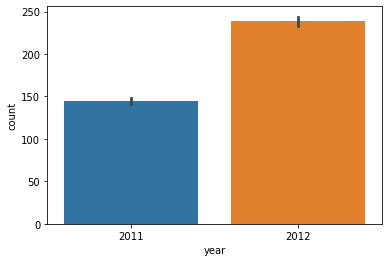

In [12]:
sns.barplot(data = train, x = 'year', y = 'count')

<AxesSubplot:xlabel='month', ylabel='count'>

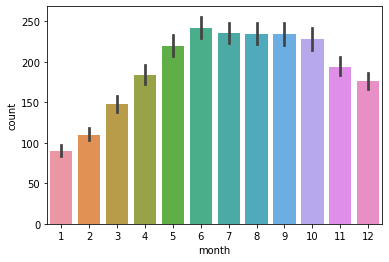

In [13]:
sns.barplot(data = train, x = 'month', y = 'count')

<AxesSubplot:xlabel='day', ylabel='count'>

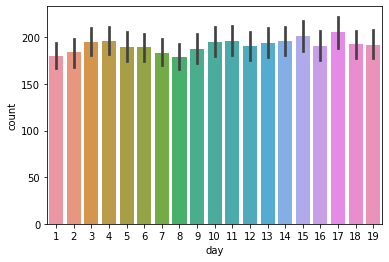

In [14]:
sns.barplot(data = train, x = 'day', y = 'count')

<AxesSubplot:xlabel='season', ylabel='count'>

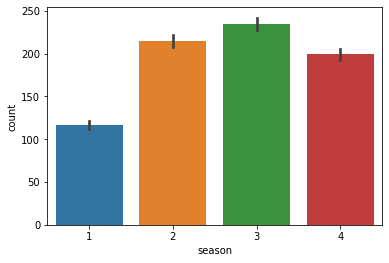

In [15]:
sns.barplot(data = train, x = 'season', y = 'count')

In [16]:
print(train[train['season'] == 1].month.unique())
print(train[train['season'] == 2].month.unique())
print(train[train['season'] == 3].month.unique())
print(train[train['season'] == 4].month.unique())

[1 2 3]
[4 5 6]
[7 8 9]
[10 11 12]


여기서 unique를 해준 이유는, season으로 할당된 달이 어떤 달인지를 보고자 함

In [26]:
# from matplotlib.figure import Figure
# from mpl_toolkits.axisartist.axislines import Subplot

# fig = plt.figure() 
       
# ax = Subplot(fig, 111) 
# fig.add_subplot(ax)
    
# fig.set_size_inches(4, 5)

# sns.pointplot(data = train, x = 'hour', y = 'count')

<AxesSubplot:xlabel='hour', ylabel='count'>

AttributeError: 'numpy.int64' object has no attribute 'strip'

<Figure size 288x360 with 1 Axes>

In [33]:
corr_data = [['datetime', 'season', 'holiday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']]

In [34]:
corr_data.corr()

AttributeError: 'list' object has no attribute 'corr'

In [30]:
color_map = plt.cm.PuBu
sns.heatmap(corr_data.corr(), 
            linewidths = 0.1,
           square = True,
           annot = True,
           cmap = colormap)


AttributeError: 'list' object has no attribute 'corr'